In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
print('Reading CSV...')
print(datetime.datetime.now())

data = pd.read_csv('Vancouver_bookings_all.csv')

print(datetime.datetime.now())
print('Finish\n')

Reading CSV...
2018-12-18 16:56:41.050937
2018-12-18 16:56:49.767668
Finish



# Total de Carros

In [3]:
total_cars = len(data.plate.unique())
total_cars

1113

# Seleciona apenas os dados necessários

In [4]:
data = data[['init_date','final_date','plate','distance']]

#  Passa para o formato datetime

In [5]:
data['init_date'] = pd.to_datetime(data['init_date'])
data['final_date'] = pd.to_datetime(data['final_date'])

# Adiciona duração da viagem

In [6]:
data['duracao'] = (data['final_date']-data['init_date']).astype('timedelta64[m]')

# Separa dataset de dias de semana e finais de semana

In [16]:
# 5 = sabado e 6 = domingo
weekends_numbers = [5, 6] # Num of weekends 

weekends = data[data['init_date'].dt.dayofweek.isin(weekends_numbers)] # Weekends travels
weekdays = data[~data['init_date'].dt.dayofweek.isin(weekends_numbers)] # Weekdays travels

# Cria array minuto a minuto da coleta

In [8]:
all_minutes = pd.date_range(data.init_date.min(), data.final_date.max(), freq='min')

#  1 - Percorre todos os minutos de coleta pegando a qtd de carros coletados por minuto (Todos os registros, inclusive reservas)

## Dias de Semana

In [9]:
busy = []

for minuto in all_minutes:
    carros_no_minuto = len(weekdays[(weekdays['init_date'] <= minuto) & (minuto < weekdays['final_date'])].plate.unique())    
    busy.append([minuto, carros_no_minuto])

preprocess_weekdays = pd.DataFrame(busy, columns=['date','count'])

/home/rooke/.anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/rooke/.anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# 2 - Cria array com todos os minutos de um dia

In [10]:
minutes = pd.date_range(start='2016-12-31 00:00:00', end='2016-12-31 23:59:00', freq='min')
minutos = minutes.time

# 3 - Cria estrutura para contabilizar a quantidade de carros por minuto e a quantidade daquele minuto que tem carros

In [11]:
result = {}

for reg in preprocess_weekdays.values:
    indice = str(reg[0].hour)+':'+str(reg[0].minute)
    #tem o indice?
    if not result.has_key(indice):
        result[indice] = [0,0]
    
    if (reg[1] > 0):
        result[indice][0] += reg[1]
        result[indice][1] += 1

# 4 - Cria uma estrutura para contabilizar a variância

In [12]:
desvio = {}

for reg in preprocess_weekdays.values:
    indice = str(reg[0].hour)+':'+str(reg[0].minute)
    #tem o indice?
    if not desvio.has_key(indice):
        desvio[indice] = 0.0
    
    if (reg[1] > 0):
        media = result[indice][0]/result[indice][1]
        std = ((reg[1]-media)**2)/result[indice][1]
        desvio[indice] += std

# 5 - Tranforma a variância em desvio padrão

In [13]:
import math

for reg in desvio:
    desvio[reg] = math.sqrt(desvio[reg])

# 6 - Cria dataframe com todas essas informações

In [14]:
weekdays_compilado_booked = []

for reg in result:
    media = result[reg][0]/result[reg][1]
    weekdays_compilado_booked.append([reg, media, desvio[reg]])
    
weekdays_compilado_booked
df_weekdays_compilado_booked = pd.DataFrame(weekdays_compilado_booked, columns=['time','mean','std'])
# muda tipo do dado
df_weekdays_compilado_booked['time'] = pd.to_datetime(df_weekdays_compilado_booked['time'], format="%H:%M")
# ordena por minuto
df_weekdays_compilado_booked = df_weekdays_compilado_booked.sort_values(by=['time'])

# Repete dos passos 1 a 6 para os outros conjuntos de dados

## Dias de Semana que tem viagens > 30min ou distancia > 3metros

In [51]:
#print len(weekdays[(weekdays['duracao'] <= 30) & (weekdays['distance'] < 3)])
#print len(weekdays[(weekdays['duracao'] <= 30) & (weekdays['distance'] < 40)])
#print len(weekdays)
#print len(weekdays[~((weekdays['duracao'] <= 30) & (weekdays['distance'] < 3))])
#print len(weekdays)-len(weekdays[~((weekdays['duracao'] <= 30) & (weekdays['distance'] < 3))])

In [17]:
weekdays = weekdays[(weekdays['duracao'] >= 30) | (weekdays['distance'] > 3)]

#1
busy = []

for minuto in all_minutes:
    carros_no_minuto = len(weekdays[(weekdays['init_date'] <= minuto) & (minuto < weekdays['final_date'])].plate.unique())    
    busy.append([minuto, carros_no_minuto])

preprocess_weekdays = pd.DataFrame(busy, columns=['date','count'])

#2
minutes = pd.date_range(start='2016-12-31 00:00:00', end='2016-12-31 23:59:00', freq='min')
minutos = minutes.time

#3
result = {}

for reg in preprocess_weekdays.values:
    indice = str(reg[0].hour)+':'+str(reg[0].minute)
    #tem o indice?
    if not result.has_key(indice):
        result[indice] = [0,0]
    
    if (reg[1] > 0):
        result[indice][0] += reg[1]
        result[indice][1] += 1
    
#4
desvio = {}

for reg in preprocess_weekdays.values:
    indice = str(reg[0].hour)+':'+str(reg[0].minute)
    #tem o indice?
    if not desvio.has_key(indice):
        desvio[indice] = 0.0
    
    if (reg[1] > 0):
        media = result[indice][0]/result[indice][1]
        std = ((reg[1]-media)**2)/result[indice][1]
        desvio[indice] += std
    
#5
import math

for reg in desvio:
    desvio[reg] = math.sqrt(desvio[reg])

#6
weekdays_compilado_busy = []

for reg in result:
    media = result[reg][0]/result[reg][1]
    weekdays_compilado_busy.append([reg, media, desvio[reg]])
    

df_weekdays_compilado_busy = pd.DataFrame(weekdays_compilado_busy, columns=['time','mean','std'])
# muda tipo do dado
df_weekdays_compilado_busy['time'] = pd.to_datetime(df_weekdays_compilado_busy['time'], format="%H:%M")
# ordena por minuto
df_weekdays_compilado_busy = df_weekdays_compilado_busy.sort_values(by=['time'])


## Finais de Semana

In [18]:

#1
busy = []

for minuto in all_minutes:
    carros_no_minuto = len(weekends[(weekends['init_date'] <= minuto) & (minuto < weekends['final_date'])].plate.unique())    
    busy.append([minuto, carros_no_minuto])

preprocess_weekends = pd.DataFrame(busy, columns=['date','count'])

#2
minutes = pd.date_range(start='2016-12-31 00:00:00', end='2016-12-31 23:59:00', freq='min')
minutos = minutes.time

#3
result = {}

for reg in preprocess_weekends.values:
    indice = str(reg[0].hour)+':'+str(reg[0].minute)
    #tem o indice?
    if not result.has_key(indice):
        result[indice] = [0,0]
    
    if (reg[1] > 0):
        result[indice][0] += reg[1]
        result[indice][1] += 1
    
#4
desvio = {}

for reg in preprocess_weekends.values:
    indice = str(reg[0].hour)+':'+str(reg[0].minute)
    #tem o indice?
    if not desvio.has_key(indice):
        desvio[indice] = 0.0
    
    if (reg[1] > 0):
        media = result[indice][0]/result[indice][1]
        std = ((reg[1]-media)**2)/result[indice][1]
        desvio[indice] += std
    
#5
import math

for reg in desvio:
    desvio[reg] = math.sqrt(desvio[reg])

#6
weekends_compilado_booked = []

for reg in result:
    media = result[reg][0]/result[reg][1]
    weekends_compilado_booked.append([reg, media, desvio[reg]])
    

df_weekends_compilado_booked = pd.DataFrame(weekends_compilado_booked, columns=['time','mean','std'])
# muda tipo do dado
df_weekends_compilado_booked['time'] = pd.to_datetime(df_weekends_compilado_booked['time'], format="%H:%M")
# ordena por minuto
df_weekends_compilado_booked = df_weekends_compilado_booked.sort_values(by=['time'])


## Finais de Semana que tem viagens > 30min ou distancia > 3metros

In [19]:
weekends = weekends[(weekends['duracao'] >= 30) | (weekends['distance'] > 3)]

#1
busy = []

for minuto in all_minutes:
    carros_no_minuto = len(weekends[(weekends['init_date'] <= minuto) & (minuto < weekends['final_date'])].plate.unique())    
    busy.append([minuto, carros_no_minuto])

preprocess_weekends = pd.DataFrame(busy, columns=['date','count'])

#2
minutes = pd.date_range(start='2016-12-31 00:00:00', end='2016-12-31 23:59:00', freq='min')
minutos = minutes.time

#3
result = {}

for reg in preprocess_weekends.values:
    indice = str(reg[0].hour)+':'+str(reg[0].minute)
    #tem o indice?
    if not result.has_key(indice):
        result[indice] = [0,0]
    
    if (reg[1] > 0):
        result[indice][0] += reg[1]
        result[indice][1] += 1
    
#4
desvio = {}

for reg in preprocess_weekends.values:
    indice = str(reg[0].hour)+':'+str(reg[0].minute)
    #tem o indice?
    if not desvio.has_key(indice):
        desvio[indice] = 0.0
    
    if (reg[1] > 0):
        media = result[indice][0]/result[indice][1]
        std = ((reg[1]-media)**2)/result[indice][1]
        desvio[indice] += std
    
#5
import math

for reg in desvio:
    desvio[reg] = math.sqrt(desvio[reg])

#6
weekends_compilado_busy = []

for reg in result:
    media = result[reg][0]/result[reg][1]
    weekends_compilado_busy.append([reg, media, desvio[reg]])
    

df_weekends_compilado_busy = pd.DataFrame(weekends_compilado_busy, columns=['time','mean','std'])
# muda tipo do dado
df_weekends_compilado_busy['time'] = pd.to_datetime(df_weekends_compilado_busy['time'], format="%H:%M")
# ordena por minuto
df_weekends_compilado_busy = df_weekends_compilado_busy.sort_values(by=['time'])

# Salva todos os dados

In [20]:
df_weekdays_compilado_busy.to_csv("df_weekdays_compilado_busy.csv")
df_weekdays_compilado_booked.to_csv("df_weekdays_compilado_booked.csv")
df_weekends_compilado_busy.to_csv("df_weekends_compilado_busy.csv")
df_weekends_compilado_booked.to_csv("df_weekends_compilado_booked.csv")

# Plotando dias de Semana

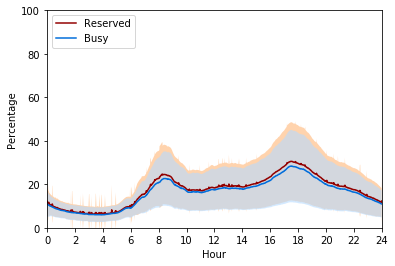

In [30]:
# Plot da media das porcentagens dos dias de semana
fig, ax = plt.subplots()
# Curva dos carros andando
ax.plot(range(len(df_weekdays_compilado_booked['time'])), (df_weekdays_compilado_booked['mean']*100/total_cars), color="#920000", label='Reserved')

std_sup = ((df_weekdays_compilado_booked['mean']+df_weekdays_compilado_booked['std'])*100/total_cars)
std_inf = ((df_weekdays_compilado_booked['mean']-df_weekdays_compilado_booked['std'])*100/total_cars)

# Curvas representando o intervalo de desvio padrão
ax.fill_between(range(len(df_weekdays_compilado_booked['time'])), std_sup, std_inf, facecolor='#ffb677', alpha=0.6)

# Curva dos carros andando
ax.plot(range(len(df_weekdays_compilado_busy['time'])), (df_weekdays_compilado_busy['mean']*100/total_cars), color="#006ddb", label='Busy')

std_sup = ((df_weekdays_compilado_busy['mean']+df_weekdays_compilado_busy['std'])*100/total_cars)
std_inf = ((df_weekdays_compilado_busy['mean']-df_weekdays_compilado_busy['std'])*100/total_cars)

# Curvas representando o intervalo de desvio padrão
ax.fill_between(range(len(df_weekdays_compilado_busy['time'])), std_sup, std_inf, facecolor='#b6dbff', alpha=0.6)

# Modificando os labels das horas
ax.xaxis.set_ticks(np.arange(0, 1441, 120))

fig.canvas.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = range(0,26,2)

ax.set_xticklabels(labels)

# Legendas e label dos eixos
plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.2)
plt.ylabel('Percentage')
plt.xlabel('Hour')
plt.ylim(0,100)
plt.xlim(0,1440)

# Salvando o plot
plt.savefig('weekdayslim.pdf')
plt.show()

# Plotando Fins de Semana

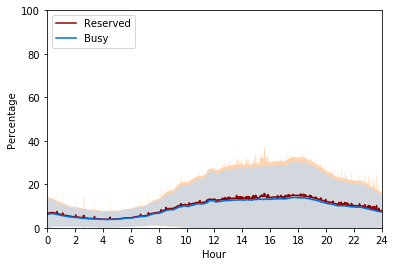

In [31]:
# Plot da media das porcentagens dos dias de semana
fig, ax = plt.subplots()
# Curva dos carros andando
ax.plot(range(len(df_weekends_compilado_booked['time'])), (df_weekends_compilado_booked['mean']*100/total_cars), color="#920000", label='Reserved')

std_sup = ((df_weekends_compilado_booked['mean']+df_weekends_compilado_booked['std'])*100/total_cars)
std_inf = ((df_weekends_compilado_booked['mean']-df_weekends_compilado_booked['std'])*100/total_cars)

# Curvas representando o intervalo de desvio padrão
ax.fill_between(range(len(df_weekends_compilado_booked['time'])), std_sup, std_inf, facecolor='#ffb677', alpha=0.6)

# Curva dos carros andando
ax.plot(range(len(df_weekends_compilado_busy['time'])), (df_weekends_compilado_busy['mean']*100/total_cars), color="#006ddb", label='Busy')

std_sup = ((df_weekends_compilado_busy['mean']+df_weekends_compilado_busy['std'])*100/total_cars)
std_inf = ((df_weekends_compilado_busy['mean']-df_weekends_compilado_busy['std'])*100/total_cars)

# Curvas representando o intervalo de desvio padrão
ax.fill_between(range(len(df_weekends_compilado_busy['time'])), std_sup, std_inf, facecolor='#b6dbff', alpha=0.6)

# Modificando os labels das horas
ax.xaxis.set_ticks(np.arange(0, 1441, 120))

fig.canvas.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = range(0,26,2)

ax.set_xticklabels(labels)

# Legendas e label dos eixos
plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.2)
plt.ylabel('Percentage')
plt.xlabel('Hour')
plt.ylim(0,100)
plt.xlim(0,1440)

# Salvando o plot
plt.savefig('weekendslim.pdf')
plt.show()